In [1]:
from ska_ost_array_config.array_config import LowSubArray, MidSubArray

`ska_ost_array_config` currently supports three subarray types: `AA4` (or the design baseline), `AA*`, and `custom`. Below are a few examples of how these subarray types can be instantiated:

In [2]:
low_aastar = LowSubArray(subarray_type="AA*")
low_aa4 = LowSubArray(subarray_type="AA4")
low_custom = LowSubArray(
    subarray_type="custom", custom_stations="C*,E1-*"
)  # selects all core stations and 6 stations in the E1 cluster

mid_aastar = MidSubArray(subarray_type="AA*")
mid_aa4 = MidSubArray(subarray_type="AA4")
mid_custom = MidSubArray(
    subarray_type="custom", custom_stations="M*,SKA017"
)  # selects all MeerKAT dishes and one of the MK+ dishes

In the case of `low_aastar`, the array configuration is stored in `low_aastar.array_config`, which is an object of type `ska_sdp_datamodels.configuration.config_model import Configuration`. It contains various information about the array layout including the station/dish names ( `low_aastar.array_config.names`) and the station/dish coordinates (`low_aastar.array_config`) in a local ENU frame. **Note** that the array configuration object is compatible with the [Radio Astronomy Simulation, Calibration, and Imaging Library (RASCIL)](https://developer.skao.int/projects/rascil/en/latest/index.html) if you wish to run your own simulations.

## Convenience functions

There are two convenience functions that allows you to plot the array layout and the plot the snapshot uv coverage for a source at zenith.

### Plot array layout

Plots the layout of the array (in this case the `AA*` configuration created above). You can pass any valid `matplotlib.pyplot.scatter()` parameters to this function. Below are a few examples.

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='X (km)', ylabel='Y (km)'>)

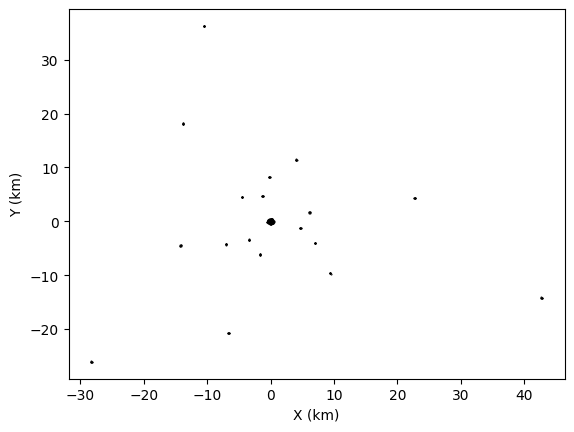

In [3]:
low_aastar.plot_array_layout()

Text(0.5, 1.0, 'LOW AA4')

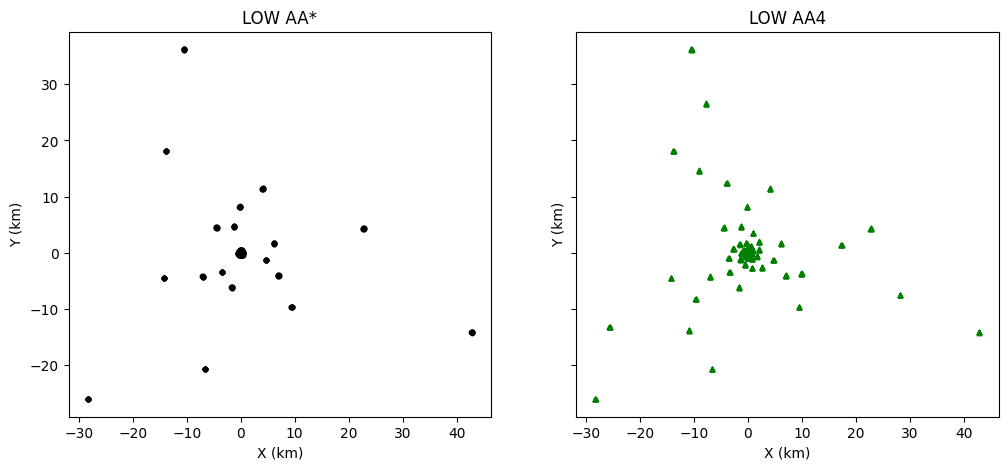

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

low_aastar.plot_array_layout(axes[0], s=10)
axes[0].set_title("LOW AA*")

low_aa4.plot_array_layout(axes[1], s=10, c="green", marker="^")
axes[1].set_title("LOW AA4")

### Plot snapshot uv coverage

Plots the snapshot uv coverage for a source at zenith. You can pass any valid `matplotlib.pyplot.scatter()` parameters to this function. Below are a few examples.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='U (km)', ylabel='V (km)'>,
 <ska_ost_array_config.UVW.UVW at 0x11e8ce0e0>)

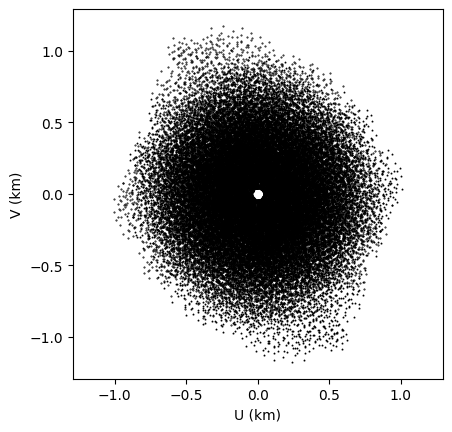

In [5]:
low_custom.plot_snapshot_zenith_uvcov(
    ref_freq=50e6,
    chan_width=5.4e3,
    n_chan=1,
    freq_undersample=100,
    method="metre",
    plot_conj=True,
)

Same as above but this time plot the uv coverage in k$\lambda$ units. **Note** here that when simulating with large numbers of frequency channels, you might be memory-limited. In that case, use the `freq_undersample`. The example below simulates every 100th channel within the full LOW continuum band.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='U (k$\\lambda$)', ylabel='V (k$\\lambda$)'>,
 <ska_ost_array_config.UVW.UVW at 0x11e7b8310>)

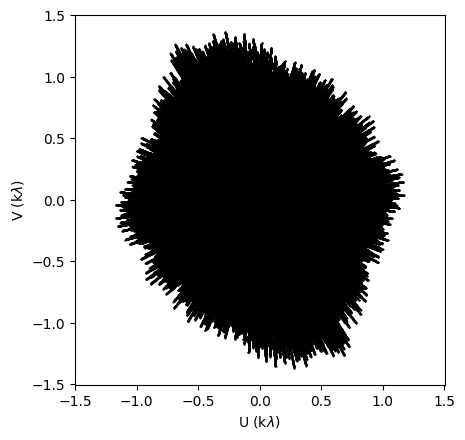

In [6]:
low_custom.plot_snapshot_zenith_uvcov(
    ref_freq=50e6,
    chan_width=5.4e3,
    n_chan=55296,
    freq_undersample=100,
    method="lambda",
    scale="kilo",
    plot_conj=True,
)

If you want to plot the conjugates using a different colour and a different symbol, use the `c_conj` and `marker_conj` keys.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='U (k$\\lambda$)', ylabel='V (k$\\lambda$)'>,
 <ska_ost_array_config.UVW.UVW at 0x11e77fcd0>)

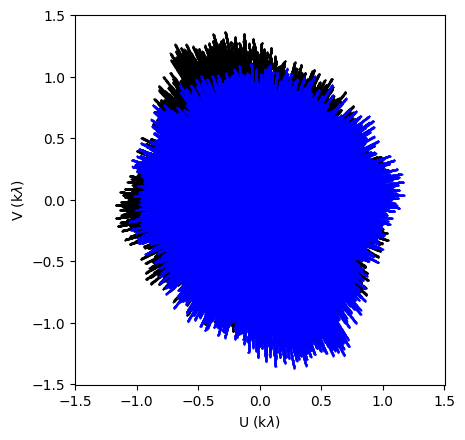

In [7]:
low_custom.plot_snapshot_zenith_uvcov(
    ref_freq=50e6,
    chan_width=5.4e3,
    n_chan=55296,
    freq_undersample=100,
    method="lambda",
    scale="kilo",
    plot_conj=True,
    c_conj="b",
    marker_conj="^",
)

### Plot uv coverage for a generic observation

`ska_ost_array_config.simulation_utils.simulate_observation()` allows you to simulate a generic observation with LOW and MID telescopes. Note that it only generates the meta data for the observation and not the visibilities themselves. Also note that there is no explicit warning if the specified source is below the horizon; when this happens, the corresponding row is flagged. 

The example below simulates a 1-hour MID AA* observation with 1000 channels with the frequency of the first channel being 1420 MHz.

In [8]:
from ska_ost_array_config.simulation_utils import simulate_observation
from astropy.coordinates import SkyCoord
from astropy import units
from astropy.time import Time
from ska_ost_array_config.UVW import UVW

phase_centre = SkyCoord("04:00:00 -75:00:00", unit=(units.hourangle, units.deg))

observation = simulate_observation(
    array_config=MidSubArray(subarray_type="AA*").array_config,
    phase_centre=phase_centre,
    start_time=Time.now(),
    duration=3600.0,
    integration_time=1,
    ref_freq=1420e6,
    chan_width=13.4e3,
    n_chan=1000,
    horizon=20,
    freq_undersample=100,
    time_undersample=10,
)

uvw = UVW(observation, ignore_autocorr=True)

You can then plot the uv-coverage of the simulated observation with `UVW.plot_uv_coverage()`. 

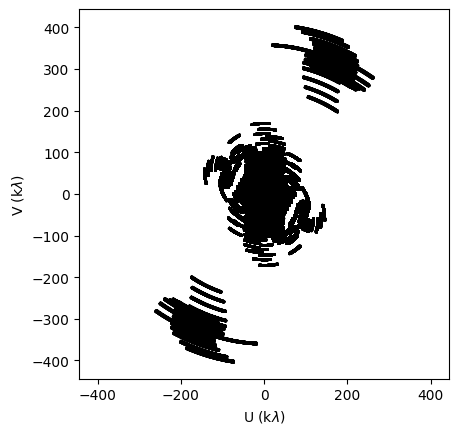

In [9]:
from ska_ost_array_config.UVW import plot_uv_coverage

fig, axes = plot_uv_coverage(uvw)

You can also plot histograms of the baseline distributions. The example below plots the histograms of baseline distribution in metres (left panel) and in lambda (right panel).

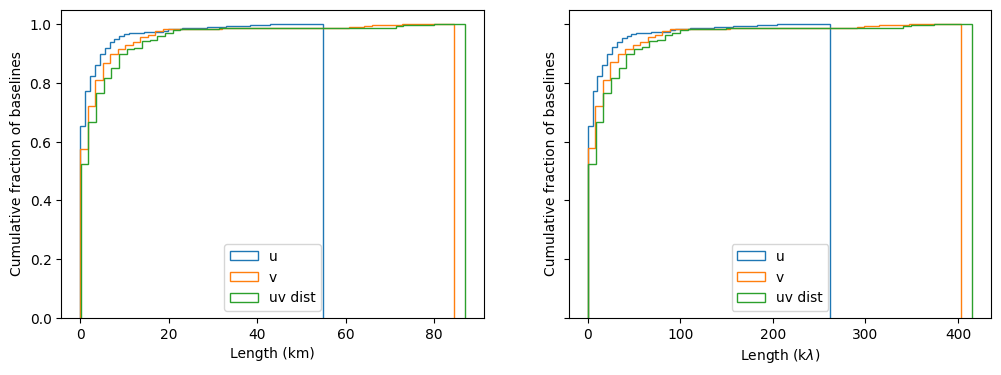

In [10]:
from ska_ost_array_config.UVW import plot_baseline_distribution

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

plot_baseline_distribution(uvw, axes[0], method="metre", plot_type="u", label="u")
plot_baseline_distribution(uvw, axes[0], method="metre", plot_type="v", label="v")
plot_baseline_distribution(
    uvw, axes[0], method="metre", plot_type="uv", label="uv dist"
)
axes[0].legend()

plot_baseline_distribution(uvw, axes[1], method="lambda", plot_type="u", label="u")
plot_baseline_distribution(uvw, axes[1], method="lambda", plot_type="v", label="v")
plot_baseline_distribution(
    uvw, axes[1], method="lambda", plot_type="uv", label="uv dist"
)
axes[1].legend()

### Export CASA-compatible antenna list 

If you wish to run simulations using CASA's simutil module, you can export the antenna list using generate_casa_antenna_list(). For example,

In [11]:
low_custom.generate_casa_antenna_list("low.txt")
mid_custom.generate_casa_antenna_list("mid.txt")

### Plots included in the memo

**Memo section B.1**

Text(0.5, 1.0, 'Baseline distribution')

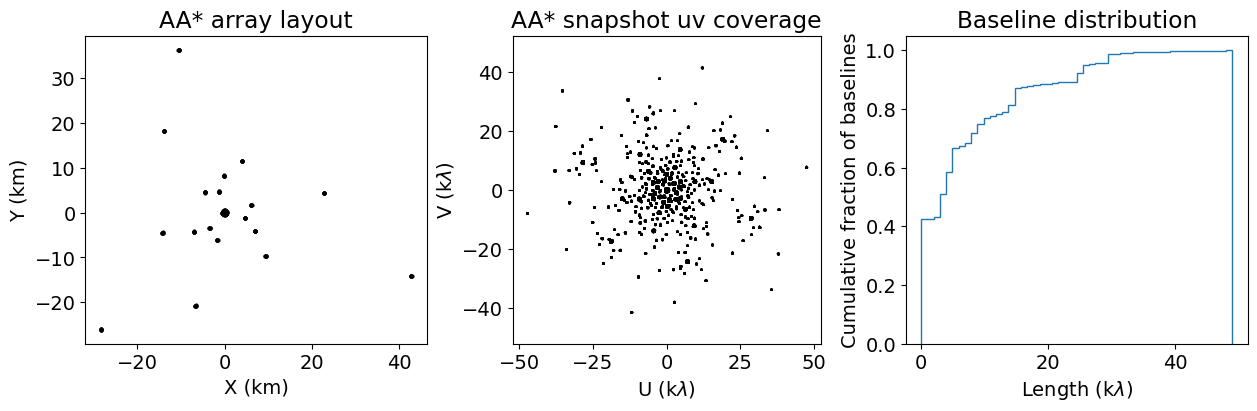

In [12]:
from ska_ost_array_config.array_config import LowSubArray
from ska_ost_array_config.UVW import plot_baseline_distribution
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 14

# Create a subarray containing all Low stations in
# AA* configuration
low_aastar = LowSubArray(subarray_type="AA*")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot the array layout
low_aastar.plot_array_layout(
    axes=axes[0],
    scale="kilo",
    s=4,
)
axes[0].set_title("AA* array layout")

# Plot snapshot uv coverage for a fiduccial source at zenith
uvw = low_aastar.plot_snapshot_zenith_uvcov(
    axes=axes[1],
    ref_freq=200e6,
    chan_width=5.4e3,
    n_chan=1,
    method="lambda",
    plot_conj=True,
)
axes[1].set_title("AA* snapshot uv coverage")

# Make a histogram of the baseline distribution
plot_baseline_distribution(
    uvw,
    axes=axes[2],
    method="lambda",
    scale="kilo",
    plot_type="uv",
    label="uv distance",
)
axes[2].set_title("Baseline distribution")

**Memo section B.2**

In [13]:
from ska_ost_array_config.array_config import MidSubArray, filter_array_by_distance
from ska_ost_array_config.UVW import (
    UVW, 
    plot_baseline_distribution, 
    plot_uv_coverage
)
from ska_ost_array_config.simulation_utils import (
    find_rise_set_times,
    simulate_observation,
)
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy import units
from astropy.time import Time, TimeDelta

plt.rcParams["font.size"] = 14

# Create a custom MID array using all dishes within 1 km from the array centre
mid_aastar = MidSubArray(subarray_type="AA*")
custom_stations = filter_array_by_distance(mid_aastar, 1000.0 * units.m)
mid_custom = MidSubArray(subarray_type="custom", custom_stations=custom_stations)

# Define the pointing centre
lmc = SkyCoord("05:23:34 -69:45:00", unit=(units.hourangle, units.deg))

# Find the UTC time when the source transits
_, transit_time, _ = find_rise_set_times(
    location=mid_custom.array_config.location,
    phase_centre=lmc,
    date=Time.now(),
    elevation_limit=20.0,
)

# Simulate the observation and get the uvw values
duration = 7200.0  # in seconds
observation = simulate_observation(
    array_config=mid_custom.array_config,
    phase_centre=lmc,
    start_time=transit_time - TimeDelta(duration, format="sec"),
    duration=duration,
    integration_time=1,
    ref_freq=0.95e6,
    chan_width=13.44e3,
    n_chan=60628,
    horizon=20,
    freq_undersample=200,
    time_undersample=20,
)
uvw = UVW(observation, ignore_autocorr=True)

del observation

Text(0.5, 1.0, 'Baseline distribution')

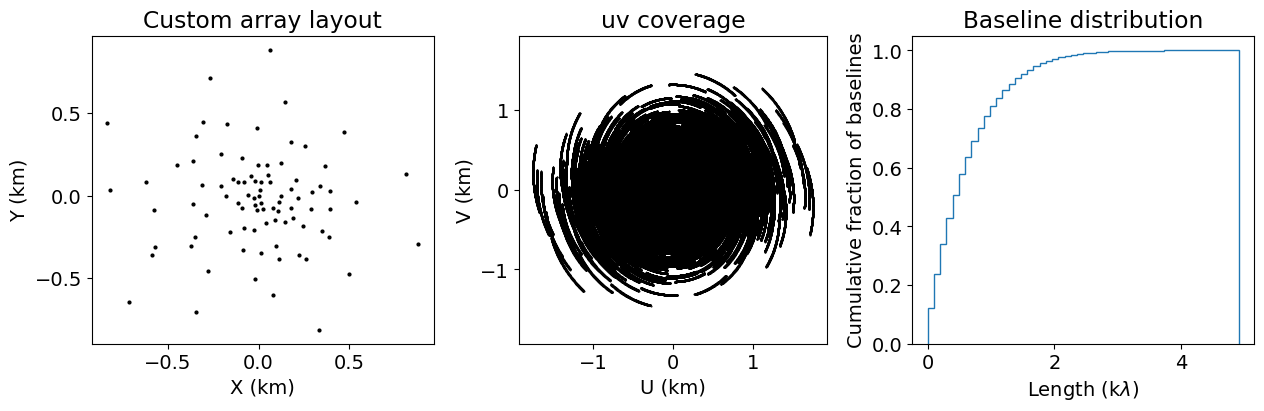

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot the array layout
mid_custom.plot_array_layout(
    axes=axes[0],
    scale="kilo",
    s=4,
)
axes[0].set_title("Custom array layout")

# Plot the UV coverage
plot_uv_coverage(uvw, axes=axes[1], method="metre", scale="kilo", plot_conj=True)
axes[1].set_title("uv coverage")

# Plot the baseline distribution
plot_baseline_distribution(
    uvw,
    axes=axes[2],
    method="lambda",
    scale="kilo",
    plot_type="uv",
    label="uv distance",
)
axes[2].set_title("Baseline distribution")

## Specifying non-SKAO facilities

Sometimes it might be useful to include non-SKAO facilities to simulate VLBI-type experiments. You can define external facilities as objects to class `ska_ost_array_config.simulation_utils.ExternalTelescope` and add them to the subarrays using the `external_telescopes` parameter while defining the `LowSubArray` and `MidSubArray` classes. **Note** that this is not a valid observing mode with SKAO telescopes. This functionality is provided in the code purely for running simulations.

The example below defines a subarray that includes all SKA LOW stations in the core along with two non-existent stations located at ATCA and ASKAP.

In [15]:
from astropy.coordinates import EarthLocation
from ska_ost_array_config.simulation_utils import ExternalTelescope

askap = ExternalTelescope(
    label="askap",
    location=EarthLocation.from_geodetic(lon=116.637, lat=-26.696)
)

atca_w196 = ExternalTelescope(
    label="atca_w196",
    location=EarthLocation.from_geodetic(
        lon=149.5489798, lat=-30.3144576, height=209.3
    )
)

low_test = LowSubArray(
    subarray_type="custom", 
    custom_stations="C*", 
    external_telescopes=[askap,atca_w196]
)

print("Stations in the subarray:", ','.join(low_test.array_config.names.data))

Stations in the subarray: C1,C10,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C11,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C12,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C13,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C14,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C15,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C16,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C17,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C18,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C19,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C2,C20,C200,C201,C202,C203,C204,C205,C206,C207,C208,C209,C21,C210,C211,C212,C213,C214,C215,C216,C217,C218,C219,C22,C220,C221,C222,C223,C224,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C7,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C8,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C9,C9

You can then plot, for example, the array layout and snapshot uv coverage as follows

Text(0.5, 1.0, 'Baseline distribution')

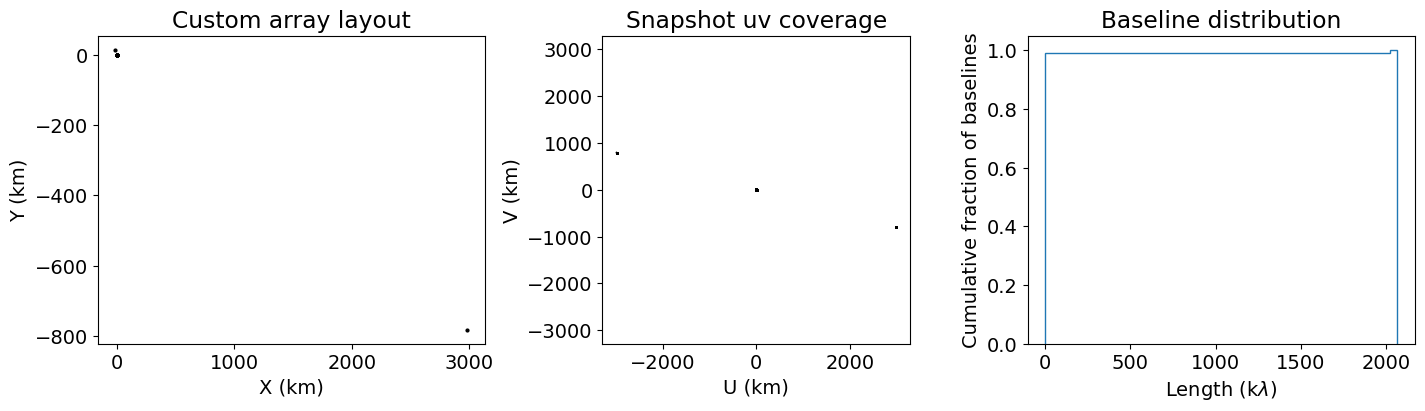

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))

# Plot the array layout
low_test.plot_array_layout(
    axes=axes[0],
    scale="kilo",
    s=4,
)
axes[0].set_title("Custom array layout")

# Plot snapshot uv coverage for a fiduccial source at zenith
uvw = low_test.plot_snapshot_zenith_uvcov(
    axes=axes[1],
    ref_freq=200e6,
    chan_width=5.4e3,
    n_chan=1,
    method="metre",
    plot_conj=True,
)
axes[1].set_title("Snapshot uv coverage")

# Make a histogram of the baseline distribution
plot_baseline_distribution(
    uvw,
    axes=axes[2],
    method="lambda",
    scale="kilo",
    plot_type="uv",
    label="uv distance",
)
axes[2].set_title("Baseline distribution")